In [1]:
import tensorflow as tf

from tensorflow import keras

from tensorflow.keras import layers

from tensorflow.keras.layers.experimental import preprocessing

import numpy as np

import pandas as pd

import statistics as stat

import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import tree

In [2]:
df = pd.read_csv('data.csv')
len(df)
df = df.reset_index()
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(1, inplace=True)

In [3]:
features = ['RM','ZN','B','DIS','CHAS']
X = df.loc[:, features]
y = df.loc[:, ['MEDV']]

In [4]:
kf = KFold(n_splits = 5, shuffle = True, random_state = 973)
for train_index, test_index in kf.split(X, y):

    X_train, X_test= X.iloc[train_index], X.iloc[test_index]
    y_train, y_test= y.iloc[train_index], y.iloc[test_index]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=973, test_size=0.333)

In [11]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
y_train_enc = label_encoder.fit_transform(y_train.values.ravel())
lab_enc = preprocessing.LabelEncoder()
y_test_enc = lab_enc.fit_transform(y_test.values.ravel())

In [13]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train_enc)
y_pred = clf.predict(X_test)

In [9]:
r2_score(y_test, y_pred)#K Fold

-78.47791663994082

In [14]:
r2_score(y_test, y_pred)#Train Test

-63.66529301902041

[Text(250.18411060733186, 213.0912, 'X[0] <= 7.479\ngini = 0.992\nsamples = 340\nvalue = [1, 1, 1, 2, 3, 1, 1, 1, 1, 2, 1, 2, 1, 1\n2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1\n2, 1, 2, 1, 2, 1, 3, 2, 2, 1, 2, 2, 1, 3\n2, 1, 1, 1, 5, 1, 2, 2, 1, 2, 1, 1, 2, 1\n2, 1, 2, 1, 1, 4, 1, 1, 1, 2, 1, 3, 1, 2\n4, 2, 4, 4, 3, 3, 2, 2, 2, 2, 5, 3, 2, 2\n2, 3, 6, 2, 1, 2, 3, 1, 5, 4, 2, 1, 6, 1\n2, 6, 1, 3, 2, 2, 2, 5, 1, 1, 3, 4, 4, 2\n4, 2, 1, 2, 1, 2, 3, 1, 2, 1, 2, 2, 3, 2\n1, 1, 3, 1, 1, 2, 1, 1, 1, 4, 2, 1, 1, 3\n1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 10]'),
 Text(180.27530843213273, 204.3936, 'X[0] <= 6.403\ngini = 0.992\nsamples = 320\nvalue = [1, 1, 1, 2, 3, 1, 1, 1, 1, 2, 1, 2, 1, 1\n2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1\n2, 1, 2, 1, 2, 1, 3, 2, 2, 1, 2, 2, 1, 3\n2, 1, 1, 1, 5, 1, 2, 2, 1, 2, 1, 1, 2, 1\n2, 1, 2, 1, 1, 4, 1, 1, 1, 2, 1, 3, 1, 2\n4, 2, 4, 4, 3, 3, 2, 2, 2, 2, 5, 3, 2, 2\n2, 3, 6, 2, 

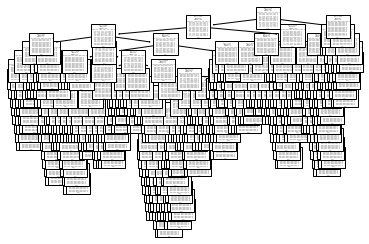

In [15]:
tree.plot_tree(clf)

In [16]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [17]:
import graphviz

In [18]:
dot_data = tree.export_graphviz(clf, out_file=None)